# IA006 - EFC 3


### Fernanda Ferreira              RA: 163676
### Renan Del Buono Brotto    RA: 137442



## Parte I - Revisitando o algoritmo de retropropagação do erro

$J(\cdot) = e_1^2 + e_2^2$, com $e_1^2 = (d_1 - y_1)^2$ e $e_2^2 = (d_2 - y_2)^2$

Da linearidade do operador derivada, temos:

$\dfrac{dJ}{dv_{21}} = \dfrac{d(e_1^{2})}{dv_{21}} + \dfrac{d(e_2^{2})}{dv_{21}}$

Desenvolvendo o primeiro termo, temos:

$\dfrac{d(e_1^2)}{dv_{21}} = \dfrac{d e_{1}^{2}}{de_1} \dfrac{d e_{1}}{dy_1} \dfrac{d y_{1}}{dv_{21}} $

A saída $y_1$ pode ser escrita da seguinte maneira: $y_1 = w_{10}a_1 + w_{20}a_2 + w_{30}a_3 + w_{00}$, onde $a_1$ denota a saída do primeiro neurônio da camada intermediária, $a_2$ a saída do segundo neurônio e $a_3$ a saída associada ao terceiro neurônio. 

O peso sináptico que estamos interessados, $v_{21}$, está associado à ativação $a_2$. Podemos escrever essa ativação da seguinte maneira:

$a_2 = f(v_{01} + v_{11}x_1 + v_{21}x_2)$, onde $f(\cdot)$ corresponde à função de ativação escolhida. Deste modo, temos que $y_1 = g(f(v_{21}))$. Voltando à derivada de $e_1^{2}$ em relação a $v_{21}$, temos:


$\dfrac{de_{1}^{2}}{dv_{21}} = \dfrac{de_{1}^{2}}{de_1} \dfrac{de_{1}}{dy_1} \dfrac{dy_{1}}{da_2} \dfrac{da_{2}}{dv_{21}} = -2e_1w_{20} \dot{f}(v_{01} + v_{11}x_1 + v_{21}x_2)x_2 $

Repetindo o mesmo raciocínio para $\dfrac{de_{2}^{2}}{dv_{21}}$, temos:

$\dfrac{de_{2}^{2}}{dv_{21}} = \dfrac{de_2^2}{de_2} \dfrac{de_2}{dy_2} \dfrac{dy_2}{da_2} \dfrac{da_2}{dv_{21}} = -2e_2w_{11} \dot{f}(v_{01} + v_{11}x_1 + v_{21}x_2)x_2$

Finalmente, temos:

$\boxed{\dfrac{dJ}{dv_{21}} = -2\dot{f}(v_{01} + v_{11}x_1 + v_{21}x_2)x_2(e_1w_{20} + e_2w_{11})}$.

## Parte II - Classificação Binária com redes MLPs e SVMs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import scipy.io as sio
from sklearn.metrics import classification_report, confusion_matrix, f1_score


#from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
#from keras import losses
from sklearn import svm

#from pylib.plot import plot_decision_boundary
import warnings
warnings.filterwarnings('ignore')

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = sio.loadmat("Dataset/dados_treinamento.mat")
x_train = train['X']
y_train = train['y']

val = sio.loadmat("Dataset/dados_val.mat")
x_val = val['Xval']
y_val = val['yval']

test = sio.loadmat("Dataset/dados_teste.mat")
x_test = test['Xt']
y_test = test['yt']

#x_test.shape, x_val.shape

#y_train.ravel()

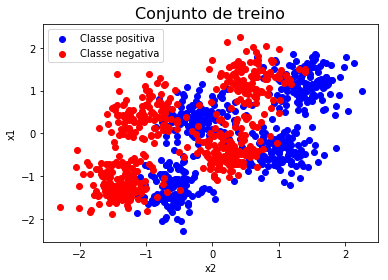

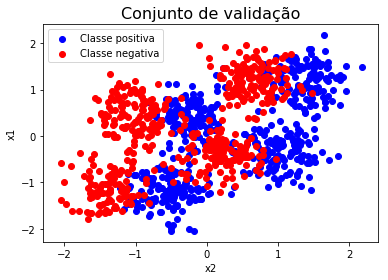

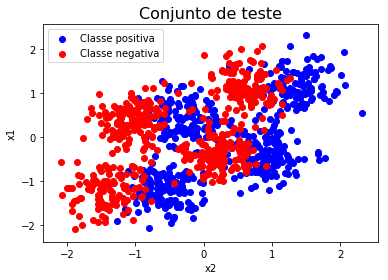

In [3]:
def grafico_dados(x, y):
    X1 = []
    X_1 = []
    for i in range(len(x)):
        if y[i] > 0:
            X1.append(x[i])
        else:
            X_1.append(x[i])
    return np.array(X1), np.array(X_1)

X_train, X2_train = grafico_dados(x_train, y_train)

plt.scatter(X_train[:,0],X_train[:,1], c='b', marker='o', label='Classe positiva')
plt.scatter(X2_train[:,0],X2_train[:,1], c='r',marker='o', label='Classe negativa')
plt.legend()
plt.title('Conjunto de treino', fontsize=16)
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

X_val, X2_val = grafico_dados(x_val, y_val)

plt.scatter(X_val[:,0],X_val[:,1], c='b', marker='o', label='Classe positiva')
plt.scatter(X2_val[:,0],X2_val[:,1], c='r',marker='o', label='Classe negativa')
plt.legend()
plt.title('Conjunto de validação', fontsize=16)
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

X_test, X2_test = grafico_dados(x_test, y_test)

plt.scatter(X_test[:,0],X_test[:,1], c='b', marker='o', label='Classe positiva')
plt.scatter(X2_test[:,0],X2_test[:,1], c='r',marker='o', label='Classe negativa')
plt.legend()
plt.title('Conjunto de teste', fontsize=16)
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

In [4]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_val)
scaler.fit(x_test)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

#print (type(x_train), x_train.shape)
#print (x_val.shape, x_test.shape)
#print (y_train.shape)

In [5]:
num_classes = 2

def one_hot_encoding(y):
    Y = []
    for i in range(len(y)):
        if y[i] == 1:
            Y.append([0,1])
        else:
            Y.append([1,0])
    #return np.array(Y)
    return Y

y_train_bi = one_hot_encoding(y_train)
y_val_bi = one_hot_encoding(y_val)
y_test_bi = one_hot_encoding(y_test)

print (y_train[0],y_train_bi[0])
print (y_train[2], y_train_bi[2])

[1] [0, 1]
[-1] [1, 0]


## Multi Layer Perceptron (MLP)

In [6]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [7]:
def Confusion_matrix_mlp(y_ver, y_est):
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    for i in range(len(y_est)):
        if y_est[i] == [1, 0] and y_ver[i] == [1, 0]:
            tp = tp + 1
        
        elif y_est[i] == [1, 0] and y_ver[i] == [0, 1]:
            fp = fp + 1
        
        elif y_est[i] == [0, 1] and y_ver[i] == [1, 0]:
            fn = fn + 1
        
        elif y_est[i] == [0, 1] and y_ver[i] == [0, 1]:
            tn = tn + 1

    R = float(tp/(tp + fn))
    P = float(tp/(tp + fp))
    Pe = float((fp+fn)/(fn+tn+fp+tp)) # taxa de erro
    F1 = float(2*(float((R*P)/(R+P))))
    #cm = np.array([[tp, fn], [fp, tn]])
    
    print ('Recall:', R)
    print ('Precision:', P)
    print ('F1-score:', F1)
    print ('Taxa de erro:', Pe *100, '\n')
    #return R, P, Pe, F1,cm

In [8]:
def results(X, y, modelo):
    
    #y_bi = one_hot_encoding(y)
    
    score = model.evaluate(X, np.array(y), verbose=0)
    #print('Test loss:', score[0])
    #print('Test accuracy:', score[1], '\n')
    print('Menor valor da função custo:', score[0])
    #print('F1-score:', score[1], '\n')

    #y_pred = model.predict_classes(x_train, verbose=0)
    y_pred = modelo.predict_classes(X, batch_size=batch_size)
    
    y_pred_bi = one_hot_encoding(y_pred)
    #print (y_pred_bi)
    #print (y)
    
    Cm = Confusion_matrix_mlp(y, y_pred_bi)

    #cr = classification_report(y, y_pred_bi)
    #print ('Métricas de avaliação:\n', cr, '\n\n')
    
    
    #return score[1]

## Verificação dos números de neurônios para o menor valor da função custo e maior valor de F1-score

In [9]:
batch_size = 20
num_classes = 2
epochs = 50

In [10]:
neu = np.arange(1, 200, 10)

J = []
F1 = []

for i in neu:
    model = Sequential()
    model.add(Dense(i, activation='relu', input_shape=(2,))) #tamanho da matriz
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=[f1])

    history = model.fit(x_train, np.array(y_train_bi),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_val, np.array(y_val_bi)))
    
    score = model.evaluate(x_test, np.array(y_test_bi), verbose=0)
    J.append(score[0])
    F1.append(score[1])
    

N_Jmin: 0.3107202007174492 111 N_F1max: 0.8829999408721924 101


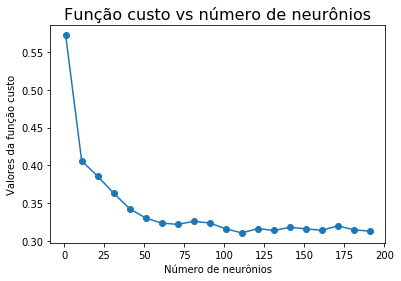

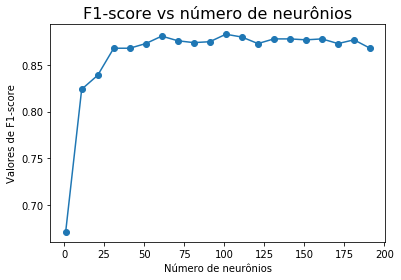

In [11]:
Jmin = np.argmin(J)
F1max = np.argmax(F1)

print ('N_Jmin:', min(J), neu[Jmin], 'N_F1max:', max(F1),  neu[F1max])

#N = min(Jmin, F1max)
    

plt.plot(neu, np.array(J), '-o')
plt.title('Função custo vs número de neurônios', fontsize=16)
plt.xlabel('Número de neurônios')
plt.ylabel('Valores da função custo')
plt.show()

plt.plot(neu, np.array(F1), '-o')
plt.title('F1-score vs número de neurônios', fontsize=16)
plt.xlabel('Número de neurônios')
plt.ylabel('Valores de F1-score')
plt.show()

In [12]:
neu = np.arange(1, 200, 10)

J2 = []
F12 = []

for i in neu:
    model = Sequential()
    model.add(Dense(i, activation='tanh', input_shape=(2,))) #tamanho da matriz
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=[f1])

    history = model.fit(x_train, np.array(y_train_bi),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_val, np.array(y_val_bi)))
    
    score = model.evaluate(x_test, np.array(y_test_bi), verbose=0)
    J2.append(score[0])
    F12.append(score[1])

N_Jmin: 0.39469469821453096 41 N_F1max: 0.8379999408721924 41


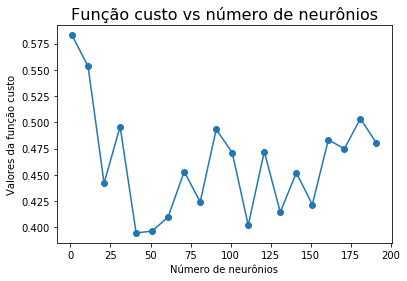

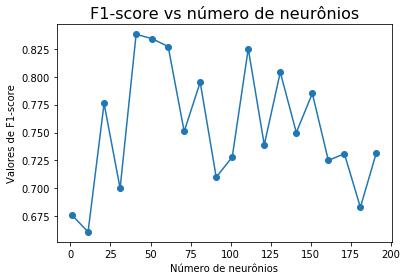

In [13]:
Jmin2 = np.argmin(J2)
F1max2 = np.argmax(F12)

print ('N_Jmin:', min(J2), neu[Jmin2], 'N_F1max:', max(F12),  neu[F1max2])

#N = min(Jmin, F1max)
    

plt.plot(neu, np.array(J2), '-o')
plt.title('Função custo vs número de neurônios', fontsize=16)
plt.xlabel('Número de neurônios')
plt.ylabel('Valores da função custo')
plt.show()

plt.plot(neu, np.array(F12), '-o')
plt.title('F1-score vs número de neurônios', fontsize=16)
plt.xlabel('Número de neurônios')
plt.ylabel('Valores de F1-score')
plt.show()

Em testes preliminares, comparamos as redes neurais com função de ativação 'ReLu' e 'tanh'. Podemos concluir que a rede com a função de ativação 'ReLu' apresentou menor variabilidade de desempenho em função do números de neurônios quando comparada com a rede com a função de ativação 'tanh'. 

Observando os gráficos acima, pode-se concluir que a partir de 50 neurônios o F1-score da rede permanece constante até aproximadamente 150 neurônios. Contudo, estudando a MLP, sabemos que conforme aumenta o número de neurônios, aumenta a complexidade computacional da rede, além de uma chance maior de ocorrer um sobreajuste do modelo. Por isso, vamos usar um dos melhores resultados de desempenho que conseguimos atingir com o menor número de neurônios. Nesse caso, vamos utilizar 51 neurônios.



In [14]:
batch_size = 20
num_classes = 2
epochs = 100

In [15]:
model = Sequential()
model.add(Dense(51, activation='relu', input_shape=(2,))) #tamanho da matriz
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 51)                153       
_________________________________________________________________
dense_82 (Dense)             (None, 2)                 104       
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [16]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=[f1])


history = model.fit(x_train, np.array(y_train_bi),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_val, np.array(y_val_bi)))

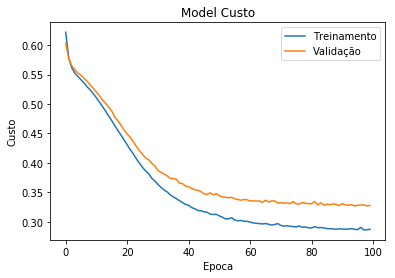

In [17]:
# Plot training & validation F1-score values
# plt.plot(history.history['f1'])
# plt.plot(history.history['val_f1'])
# plt.title('Modelo F1-score')
# plt.ylabel('F1-score')
# plt.xlabel('Epoca')
# plt.legend(['Treino', 'Teste'], loc='best')
# plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Custo')
plt.ylabel('Custo')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validação'], loc='best')
plt.show()

## Item a)

Analisando o gráfico acima, podemos observar a função custo vs o número de épocas da rede para os conjuntos de treinamento e validação. Podemos notar que ambas as curvas decrescem até em torno de 60 épocas e partir desse valor as curvas permanecem aproximadamente constantes, o que indica a convergência do modelo. 

Podemos analisar nesse gráfico também se ocorre overfiting ou underfiting, e a partir disso, ajustar os parâmetros de acordo com os resultados. No nosso caso, não observamos um crescimento sistemático do erro de validação ao longo das épocas, o que indica que o nosso modelo não está sobreajustado.

Nesse trabalho, foi utilizado o método de mini-batch (20 amostras por batch), visando um compromisso entre o custo computacional do processo de otimização e a precisão estatística. A rede obteve um resultado de desempenho no conjunto de validação, muito próximo do conjunto de treinamento. 

## Item b)

In [18]:
def plot_decision_boundary_v2(model, X, y, t=""):
    padding=0.15
    #padding=0.05
    res=0.05
    
    #max and min values of x and y of the dataset
    x_min,x_max = X[:,0].min(), X[:,0].max()
    y_min,y_max = X[:,1].min(), X[:,1].max()
    
    #range of x's and y's
    x_range = x_max-x_min
    y_range = y_max-y_min
    
    #add padding to the ranges
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding
    
    #K = model.predic(X)

    #create a meshgrid of points with the above ranges
    xx, yy = np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    #print (xx.shape, yy.shape)
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()]) 
    
    Z = Z.reshape(xx.shape)
    #Z1 = np.reshape(Z[:,0], (xx.shape))
    #Z2 = np.reshape(Z[:,1], (xx.shape))
    #print (Z.shape)
    #Zt = (Z1+Z2)/2
    #plot the contours on the grid
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    #plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    #plot the original data and labels
    #plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)
    X1, X_1 = grafico_dados(X, y)
    plt.scatter(X1[:,0],X1[:,1], c='b', marker='o', edgecolor='k', label='Classe positiva')
    plt.scatter(X_1[:,0],X_1[:,1], c='r',marker='o', edgecolor='k', label='Classe negativa')
    plt.title(t, fontsize=16)
    plt.legend()
    plt.xlabel('x2')
    plt.ylabel('x1')
    plt.show()


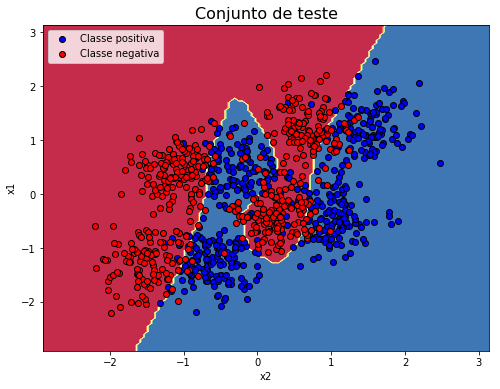

In [19]:
#plot_decision_boundary_v2(model, x_train, y_train, 'Conjunto de treino')
#plot_decision_boundary_v2(model, x_val, y_val, 'Conjunto de validação')
plot_decision_boundary_v2(model, x_test, y_test, 'Conjunto de teste')

Nesse gráfico podemos notar semelhanças entre as regiões de decisão entre a rede MLP e o Bayesiano. Notamos que as regiões são aproximadamente simétricas para as classes. Contudo, não observamos as transições bem acentuadas que temos no classificador Bayesiano.

## Item c)

In [20]:
print ('---------------- Conjunto de TREINAMENTO ---------------------')
results(x_train, y_train_bi, model)

print ('---------------- Conjunto de VALIDAÇÃO ---------------------')
results(x_val, y_val_bi, model)

print ('---------------- Conjunto de TESTE ---------------------')
results(x_test, y_test_bi, model)


---------------- Conjunto de TREINAMENTO ---------------------
Menor valor da função custo: 0.28549544739723204
Recall: 0.8764705882352941
Precision: 0.8993963782696177
F1-score: 0.887785501489573
Taxa de erro: 11.3 

---------------- Conjunto de VALIDAÇÃO ---------------------
Menor valor da função custo: 0.32777089428901673
Recall: 0.83991683991684
Precision: 0.8801742919389978
F1-score: 0.8595744680851064
Taxa de erro: 13.200000000000001 

---------------- Conjunto de TESTE ---------------------
Menor valor da função custo: 0.3109698424935341
Recall: 0.8637274549098196
Precision: 0.890495867768595
F1-score: 0.8769074262461851
Taxa de erro: 12.1 



Podemos notar que o valor de F1-score e a taxa de erro do conjunto de teste estão muito próximos do conjunto de treinamento. Isso mostra, que a rede obtida tem uma boa capacidade de generalização, ou seja, quando novos dados são testados o desempenho permanecerá praticamente o mesmo. 

## Item d)

Como mostramos no item a, utilizando um número de neurônios superior a 50, obtemos ganhos de desempenhos, medidos pela F1-score, muito pequenos. Por outro lado, um modelo exageradamente flexível (ou seja, com grande números de neurônios) é mais propenso a sobreajuste.

## Item e)


### Suport Vector Machine (SVM)

In [21]:
def plot_decision_boundary_SV(model, X, y, t=""):
    padding=0.15
    #padding=0.05
    res=0.05
    
    #max and min values of x and y of the dataset
    x_min,x_max = X[:,0].min(), X[:,0].max()
    y_min,y_max = X[:,1].min(), X[:,1].max()
    
    #range of x's and y's
    x_range = x_max-x_min
    y_range = y_max-y_min
    
    #add padding to the ranges
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding
    
    #K = model.predic(X)

    #create a meshgrid of points with the above ranges
    xx, yy = np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    #print (xx.shape, yy.shape)
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    
    Z = Z.reshape(xx.shape)
    #Z1 = np.reshape(Z[:,0], (xx.shape))
    #Z2 = np.reshape(Z[:,1], (xx.shape))
    #print (Z.shape)
    #Zt = (Z1+Z2)/2
    #plot the contours on the grid
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    #plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    #plot the original data and labels
    #plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)
#     X1, X_1 = grafico_dados(X, y)
#     plt.scatter(X1[:,0],X1[:,1], c='b', marker='o', edgecolor='k', label='Classe positiva')
#     plt.scatter(X_1[:,0],X_1[:,1], c='r',marker='o', edgecolor='k', label='Classe negativa')
    plt.title(t, fontsize=16)
    #plt.legend()
    plt.xlabel('x2')
    plt.ylabel('x1')
    
    vetores_suporte = model.support_vectors_
    #def mostra_vetores_suporte(vetores_suporte):
    for i in range(0, vetores_suporte.shape[0]):
        plt.plot(vetores_suporte[i,0], vetores_suporte[i,1], 'k+')#, label='Vetores-suporte')
    
    #plt.legend()
    plt.show()

In [22]:
def plot_decision_boundary(model, X, y, t=""):
    padding=0.15
    #padding=0.05
    res=0.05
    
    #max and min values of x and y of the dataset
    x_min,x_max = X[:,0].min(), X[:,0].max()
    y_min,y_max = X[:,1].min(), X[:,1].max()
    
    #range of x's and y's
    x_range = x_max-x_min
    y_range = y_max-y_min
    
    #add padding to the ranges
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding
    
    #K = model.predic(X)

    #create a meshgrid of points with the above ranges
    xx, yy = np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    #print (xx.shape, yy.shape)
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    
    Z = Z.reshape(xx.shape)
    #Z1 = np.reshape(Z[:,0], (xx.shape))
    #Z2 = np.reshape(Z[:,1], (xx.shape))
    #print (Z.shape)
    #Zt = (Z1+Z2)/2
    #plot the contours on the grid
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    #plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    #plot the original data and labels
    #plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)
    X1, X_1 = grafico_dados(X, y)
    plt.scatter(X1[:,0],X1[:,1], c='b', marker='o', edgecolor='k', label='Classe positiva')
    plt.scatter(X_1[:,0],X_1[:,1], c='r',marker='o', edgecolor='k', label='Classe negativa')
    plt.title(t, fontsize=16)
    plt.legend()
    plt.xlabel('x2')
    plt.ylabel('x1')
    
    #vetores_suporte = model.support_vectors_
    #def mostra_vetores_suporte(vetores_suporte):
    #for i in range(0, vetores_suporte.shape[0]):
     #   plt.plot(vetores_suporte[i,0], vetores_suporte[i,1], 'k+')#, label='Vetores-suporte')
    
    #plt.legend()
    plt.show()

In [23]:
def Confusion_matrix_svm(y_ver, y_est):
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    for i in range(len(y_est)):
        if y_est[i] == 1 and y_ver[i] == 1:
            tp = tp + 1
        
        elif y_est[i] == 1 and y_ver[i] == -1:
            fp = fp + 1
        
        elif y_est[i] == -1 and y_ver[i] == 1:
            fn = fn + 1
        
        elif y_est[i] == -1 and y_ver[i] == -1:
            tn = tn + 1

    R = float(tp/(tp + fn))
    P = float(tp/(tp + fp))
    Pe = float((fp+fn)/(fn+tn+fp+tp)) # taxa de erro
    F1 = float(2*(float((R*P)/(R+P))))
    #cm = np.array([[tp, fn], [fp, tn]])
    
    print ('Recall:', R)
    print ('Precision:', P)
    print ('F1-score:', F1)
    print ('Taxa de erro:', Pe *100, '\n')
    #return R, P, Pe, F1,cm

In [24]:
clf = svm.SVC(kernel='rbf', C=1, gamma='auto', probability=False)
clf.fit(x_train, y_train)

#y_pred_train = clf.predict(x_train)
#print ('CONJUNTO DE TREINAMENTO', '\n')
#Confusion_matrix_svm(y_train, y_pred_train)

#y_pred_val = clf.predict(x_val)
#print ('CONJUNTO DE VALIDAÇÃO', '\n')
#Confusion_matrix_svm(y_val, y_pred_val)

y_pred = clf.predict(x_test)
#print ('CONJUNTO DE TESTE')
Confusion_matrix_svm(y_test, y_pred)

Recall: 0.8622754491017964
Precision: 0.8727272727272727
F1-score: 0.8674698795180722
Taxa de erro: 13.200000000000001 



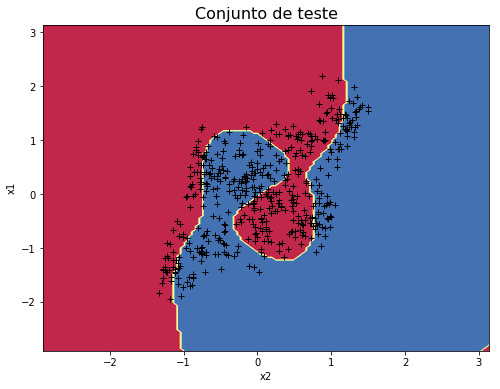

In [25]:
plot_decision_boundary_SV(clf, x_test, y_test, 'Conjunto de teste')

As regiões de decisão acima são parecidas com as regiões definidas pelo estimador Bayesiano. Os pontos em preto na figura acima, correspondem aos vetores-suporte. Notamos que esses pontos estão próximos da fronteira de decisão como esperado, uma vez que os vetores-suporte correspondem aos padrões limítrofes.

## Item f)

In [26]:
y_pred_train = clf.predict(x_train)
print ('CONJUNTO DE TREINAMENTO')
Confusion_matrix_svm(y_train, y_pred_train)

y_pred_val = clf.predict(x_val)
print ('CONJUNTO DE VALIDAÇÃO')
Confusion_matrix_svm(y_val, y_pred_val)

y_pred_test = clf.predict(x_test)
print ('CONJUNTO DE TESTE')
Confusion_matrix_svm(y_test, y_pred_test)


CONJUNTO DE TREINAMENTO
Recall: 0.8775510204081632
Precision: 0.8739837398373984
F1-score: 0.8757637474541752
Taxa de erro: 12.2 

CONJUNTO DE VALIDAÇÃO
Recall: 0.8554913294797688
Precision: 0.8604651162790697
F1-score: 0.8579710144927537
Taxa de erro: 14.7 

CONJUNTO DE TESTE
Recall: 0.8622754491017964
Precision: 0.8727272727272727
F1-score: 0.8674698795180722
Taxa de erro: 13.200000000000001 



O desempenho do classificador SVM é semelhante para os conjuntos de treinamento e teste. Portanto, podemos concluir que o classificador possui uma boa capacidade de generalização. 

## Item g)

In [27]:
train = sio.loadmat("Dataset/dados_treinamento.mat")
x_train = train['X']
y_train = train['y']

val = sio.loadmat("Dataset/dados_val.mat")
x_val = val['Xval']
y_val = val['yval']

test = sio.loadmat("Dataset/dados_teste.mat")
x_test = test['Xt']
y_test = test['yt']

### Variação do parâmetro de penalização C

In [28]:
t = [10**-3, 10**-2, 10**-1, 10, 10**2, 10**3]

f1 = []
for c in t:
    #print (c)
    clf2 = svm.SVC(kernel='rbf', C=c, gamma='auto', probability=False) #gamma é o coef. do Kernel.
    clf2.fit(x_train, y_train)
    y_pred2 = clf2.predict(x_val)
    f1.append(f1_score(y_val, y_pred2))
    
f1_max = np.argmax(f1)
c_better = t[f1_max]
print ('Melhor valor para o parâmetro C:', c_better)
print ('Máximo valor de F1-score:', max(f1))

Melhor valor para o parâmetro C: 100
Máximo valor de F1-score: 0.8701550387596899


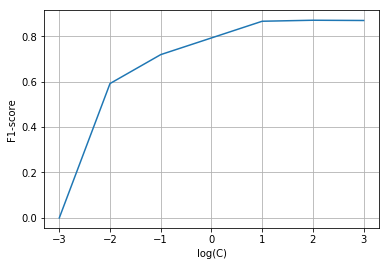

In [29]:
plt.plot(np.log10(t), f1)
plt.xlabel('log(C)')
plt.ylabel('F1-score')
plt.grid()

No gráfico acima notamos um crescente desempenho (F1-score) à medida que aumentamos C. Para valores de C superiores a 10 o desempenho permanece aproximadamente constante.

### Variação do parâmetro $\gamma$

In [30]:
f1_2 = []
for g in t:
    clf3 = svm.SVC(kernel='rbf', C=c_better, gamma=g, probability=False) #gamma é o coef. do Kernel.
    clf3.fit(x_train, y_train)
    y_pred3 = clf3.predict(x_val)
    f1_2.append(f1_score(y_val, y_pred3))
    
f1_max2 = np.argmax(f1_2)
g_better = t[f1_max2]
print ('Melhor valor para o parâmetro gamma:', g_better)
print ('Máximo valor de F1-score:', max(f1_2))

Melhor valor para o parâmetro gamma: 10
Máximo valor de F1-score: 0.8681424446583254


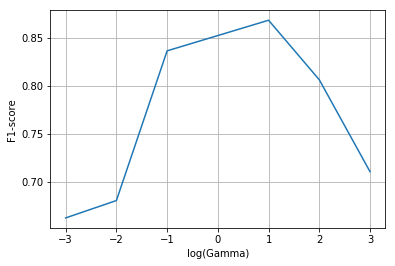

In [31]:
plt.plot(np.log10(t), f1_2)
plt.xlabel('log(Gamma)')
plt.ylabel('F1-score')
plt.grid()

Para o caso do parâmetro $\gamma$ notamos que valores pequenos (menores que 10) ou valores elevados (superiores a 10) levam a um modelo com baixo desempenho. Para o nosso caso em particular, o melhor valor de $\gamma$, ou seja o que maximiza o valor de F1-score é igual a 10.

### Após a verificação dos melhores parâmetros para a melhor F1-score, vamos implementar no conjunto de teste e validação.

In [32]:
#clf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, 
 #       probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
 #       decision_function_shape='ovr', random_state=None)

#classificador = svm.SVC(kernel='rbf', C=100, gamma=10, probability=False)
classificador = svm.SVC(kernel='rbf', C=c_better, gamma='auto', probability=False)
classificador.fit(x_train, y_train)

y_pred_train = classificador.predict(x_train)
print ('CONJUNTO DE TREINAMENTO')
Confusion_matrix_svm(y_train, y_pred_train)

y_pred_val = classificador.predict(x_val)
print ('CONJUNTO DE VALIDAÇÃO')
Confusion_matrix_svm(y_val, y_pred_val)

y_pred_test = classificador.predict(x_test)
print ('CONJUNTO DE TESTE')
Confusion_matrix_svm(y_test, y_pred_test)

CONJUNTO DE TREINAMENTO
Recall: 0.8938775510204081
Precision: 0.8938775510204081
F1-score: 0.8938775510204082
Taxa de erro: 10.4 

CONJUNTO DE VALIDAÇÃO
Recall: 0.8651252408477842
Precision: 0.8752436647173489
F1-score: 0.8701550387596899
Taxa de erro: 13.4 

CONJUNTO DE TESTE
Recall: 0.874251497005988
Precision: 0.876
F1-score: 0.8751248751248751
Taxa de erro: 12.5 



Realizamos testes preliminares, no qual treinamos e validamos apenas com o conjunto de treinamento. O F1-score obtido foi igual a um e a taxa de erro igual a zero. E quando testamos para os conjuntos de teste e validação, verificamos que o F1-score resultou em 0,7 aproximadamente. Dessa forma, o modelo se adaptou apenas para o conjunto de treinamento. Para assegurar que o classificador do SVM fosse capaz de generalizar, treinamos o modelo com o conjunto de treinamento e validamos com o conjunto de validação. De fato, o F1-score aumentou 0.16 para o conjunto de teste quando validamos com o conjunto de validação. 

Os parâmetros que apresentaram melhores valores de F1-score foram C=100 e gamma=10. 

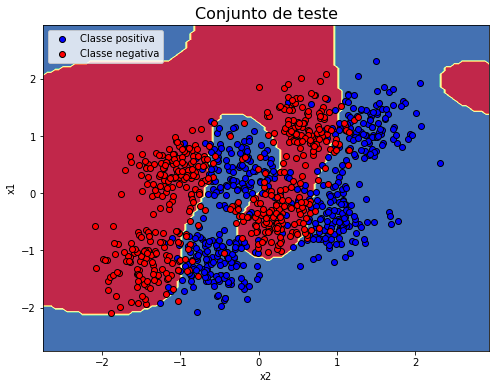

In [33]:
#plot_decision_boundary(classificador, x_train, y_train, 'Conjunto de treino')
#plot_decision_boundary(classificador, x_val, y_val, 'Conjunto de validação')
plot_decision_boundary(classificador, x_test, y_test, 'Conjunto de teste')

As regiões de decisão apresentadas acima são bastante diferentes das regiões do classificador de taxa mínima de erro. Dentre as diferenças observadas notamos uma assimetria entre as regiões de decisão. Também notamos que para a classe negativa a região de decisão se assemelha a uma região "fechada". Notamos que as regiões de decisão são desconexas para as duas classes.


Podemos observar que o conjunto de dados não são linearmente separavés. O propósito do SVM é mapear os dados em outro domínio, de forma a obter a melhor separação dos dados. Testes preliminares foram realizados para diferentes tipos de funções de Kernel, como: 'Sigmóide', 'Linear' e 'Base Radial'. O Kernel que obteve a melhor classificação dos dados, ou seja o maior valor de F1-score, foi o Kernel 'Base Radial', devido as características dos dados.

## Referências

- https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- https://markd87.github.io/articles/ml.html
- https://github.com/NSAryan12/nn-from-scratch/blob/master/nn-from-scratch.ipynb
- https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6
- https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.contour.html
- https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045


- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/svm.html#svm-kernels
- https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py